In [1]:
import numpy as np 
from numpy import inf
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from math import sqrt
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.utils.data as utils
import time


In [5]:
SP=pd.read_csv('PS1_data.csv',delimiter=',',index_col='date')
SP

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA,CAD,EUR,EUR.1,EUR.2,JPY,GBP,USD,BRL
date,,,,,,,,,,,,,,,,
04.01.00,8202.60,5672.02,6586.95,4657.83,19002.86,6665.90,1399.42,15851.00,0.6884,1.0296,1.0296,1.0296,0.009685,1.6360,1,0.5403
05.01.00,8119.42,5479.70,6502.07,4541.75,18542.55,6535.90,1402.11,16245.14,0.6897,1.0321,1.0321,1.0321,0.009604,1.6426,1,0.5438
06.01.00,8114.24,5450.11,6474.92,4500.69,18168.27,6447.20,1403.45,16106.89,0.6850,1.0328,1.0328,1.0328,0.009503,1.6474,1,0.5430
07.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
08.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
09.01.00,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15,0.6869,1.0295,1.0295,1.0295,0.009493,1.6393,1,0.5474
10.01.00,8602.50,5646.12,6925.52,4714.03,18193.41,6607.70,1457.60,17022.13,0.6869,1.0256,1.0256,1.0256,0.009514,1.6374,1,0.5510
11.01.00,8442.61,5613.90,6891.25,4671.50,18850.92,6518.90,1438.56,16572.72,0.6861,1.0336,1.0336,1.0336,0.009437,1.6475,1,0.5487
12.01.00,8359.96,5582.50,6912.81,4649.30,18677.42,6532.80,1432.25,16616.87,0.6878,1.0309,1.0309,1.0309,0.009451,1.6466,1,0.5471


In [8]:
print(SP.columns)
SP.isna().sum()

Index(['TSX', 'CAC', 'DAX', 'Eurostoxx50', 'NIKKEI225', 'FTSE100', 'SP500',
       'IBOVESPA', 'CAD', 'EUR', 'EUR.1', 'EUR.2', 'JPY', 'GBP', 'USD', 'BRL'],
      dtype='object')


TSX            0
CAC            0
DAX            0
Eurostoxx50    0
NIKKEI225      0
FTSE100        0
SP500          0
IBOVESPA       0
CAD            0
EUR            0
EUR.1          0
EUR.2          0
JPY            0
GBP            0
USD            0
BRL            0
dtype: int64

In [35]:
df_daily = SP[['TSX', 'CAC', 'DAX', 'Eurostoxx50', 'NIKKEI225', 'FTSE100', 'SP500',
       'IBOVESPA']]

index = pd.to_datetime(df_daily.index,format='%d.%m.%y').strftime('%m/%d/%Y')
df_daily.index = index

print(df_daily.isna().sum())
print(df_daily.min()) # the zero of BRK is dangerous to calculate its return need to change it by the median

print(df_daily)

TSX            0
CAC            0
DAX            0
Eurostoxx50    0
NIKKEI225      0
FTSE100        0
SP500          0
IBOVESPA       0
dtype: int64
TSX            5695.33
CAC            2403.04
DAX            2202.96
Eurostoxx50    1809.98
NIKKEI225      7054.98
FTSE100        3287.00
SP500           676.53
IBOVESPA       8370.88
dtype: float64
                 TSX      CAC       DAX  Eurostoxx50  NIKKEI225  FTSE100  \
01/04/2000   8202.60  5672.02   6586.95      4657.83   19002.86  6665.90   
01/05/2000   8119.42  5479.70   6502.07      4541.75   18542.55  6535.90   
01/06/2000   8114.24  5450.11   6474.92      4500.69   18168.27  6447.20   
01/07/2000   8429.42  5539.61   6780.96      4648.27   18193.41  6504.80   
01/08/2000   8429.42  5539.61   6780.96      4648.27   18193.41  6504.80   
01/09/2000   8429.42  5539.61   6780.96      4648.27   18193.41  6504.80   
01/10/2000   8602.50  5646.12   6925.52      4714.03   18193.41  6607.70   
01/11/2000   8442.61  5613.90   6891.25     

In [39]:
df_daily.drop_duplicates(inplace=True)
df_daily

/Users/4romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
01/04/2000,8202.60,5672.02,6586.95,4657.83,19002.86,6665.90,1399.42,15851.00
01/05/2000,8119.42,5479.70,6502.07,4541.75,18542.55,6535.90,1402.11,16245.14
01/06/2000,8114.24,5450.11,6474.92,4500.69,18168.27,6447.20,1403.45,16106.89
01/07/2000,8429.42,5539.61,6780.96,4648.27,18193.41,6504.80,1441.47,16309.15
01/10/2000,8602.50,5646.12,6925.52,4714.03,18193.41,6607.70,1457.60,17022.13
01/11/2000,8442.61,5613.90,6891.25,4671.50,18850.92,6518.90,1438.56,16572.72
01/12/2000,8359.96,5582.50,6912.81,4649.30,18677.42,6532.80,1432.25,16616.87
01/13/2000,8417.94,5633.24,6955.98,4688.35,18833.29,6531.50,1449.68,17298.07
01/14/2000,8357.46,5787.44,7173.22,4829.36,18956.55,6658.20,1465.15,17657.95
01/17/2000,8479.27,5842.78,7258.90,4884.50,19437.23,6669.50,1465.15,18053.22


In [40]:
ret_daily= np.log(df_daily / df_daily.shift(1))
print(ret_daily)
ret_daily = ret_daily.drop(ret_daily.index[[0]])
ret_daily

                 TSX       CAC       DAX  Eurostoxx50  NIKKEI225   FTSE100  \
01/04/2000       NaN       NaN       NaN          NaN        NaN       NaN   
01/05/2000 -0.010192 -0.034495 -0.012970    -0.025237  -0.024521 -0.019695   
01/06/2000 -0.000638 -0.005415 -0.004184    -0.009082  -0.020391 -0.013664   
01/07/2000  0.038107  0.016288  0.046182     0.032264   0.001383  0.008894   
01/10/2000  0.020325  0.019044  0.021094     0.014048   0.000000  0.015695   
01/11/2000 -0.018761 -0.005723 -0.004961    -0.009063   0.035502 -0.013530   
01/12/2000 -0.009838 -0.005609  0.003124    -0.004764  -0.009246  0.002130   
01/13/2000  0.006912  0.009048  0.006226     0.008364   0.008311 -0.000199   
01/14/2000 -0.007211  0.027005  0.030753     0.029633   0.006523  0.019213   
01/17/2000  0.014470  0.009517  0.011874     0.011353   0.025041  0.001696   
01/18/2000  0.012934 -0.029497 -0.026068    -0.025609  -0.012459 -0.025035   
01/19/2000  0.005274 -0.004149  0.002672     0.001547  -0.015689

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
01/05/2000,-0.010192,-0.034495,-0.012970,-0.025237,-0.024521,-0.019695,0.001920,0.024561
01/06/2000,-0.000638,-0.005415,-0.004184,-0.009082,-0.020391,-0.013664,0.000955,-0.008547
01/07/2000,0.038107,0.016288,0.046182,0.032264,0.001383,0.008894,0.026730,0.012479
01/10/2000,0.020325,0.019044,0.021094,0.014048,0.000000,0.015695,0.011128,0.042788
01/11/2000,-0.018761,-0.005723,-0.004961,-0.009063,0.035502,-0.013530,-0.013149,-0.026756
01/12/2000,-0.009838,-0.005609,0.003124,-0.004764,-0.009246,0.002130,-0.004396,0.002660
01/13/2000,0.006912,0.009048,0.006226,0.008364,0.008311,-0.000199,0.012096,0.040176
01/14/2000,-0.007211,0.027005,0.030753,0.029633,0.006523,0.019213,0.010615,0.020591
01/17/2000,0.014470,0.009517,0.011874,0.011353,0.025041,0.001696,0.000000,0.022138
01/18/2000,0.012934,-0.029497,-0.026068,-0.025609,-0.012459,-0.025035,-0.006856,-0.008343


In [65]:
fama_daily = pd.read_csv('fama_french.csv',delimiter=',')
rf_daily = fama_daily['RF']

dates = fama_daily['date']
dates = pd.to_datetime(dates,format='%Y%m%d').dt.strftime('%m/%d/%Y')

rf_daily.index = dates

target_dates = ret_daily.index

Rf_fama = rf_daily.loc[target_dates]

print(Rf_fama.shape, df_daily.shape)
print(Rf_fama)
mask = Rf_fama.isna() == True
for i in mask.index:
    if mask.loc[i] == True:
        Rf_fama.loc[i] = np.roll(Rf_fama.loc[i:],1)[0]
Rf_fama

(4167,) (4168, 8)
01/05/2000    0.021
01/06/2000    0.021
01/07/2000    0.021
01/10/2000    0.021
01/11/2000    0.021
01/12/2000    0.021
01/13/2000    0.021
01/14/2000    0.021
01/17/2000      NaN
01/18/2000    0.021
01/19/2000    0.021
01/20/2000    0.021
01/21/2000    0.021
01/24/2000    0.021
01/25/2000    0.021
01/26/2000    0.021
01/27/2000    0.021
01/28/2000    0.021
01/31/2000    0.021
02/01/2000    0.022
02/02/2000    0.022
02/03/2000    0.022
02/04/2000    0.022
02/07/2000    0.022
02/08/2000    0.022
02/09/2000    0.022
02/10/2000    0.022
02/11/2000    0.022
02/14/2000    0.022
02/15/2000    0.022
              ...  
11/30/2015    0.000
12/01/2015    0.000
12/02/2015    0.000
12/03/2015    0.000
12/04/2015    0.000
12/07/2015    0.000
12/08/2015    0.000
12/09/2015    0.000
12/10/2015    0.000
12/11/2015    0.000
12/14/2015    0.000
12/15/2015    0.000
12/16/2015    0.000
12/17/2015    0.000
12/18/2015    0.000
12/21/2015    0.000
12/22/2015    0.000
12/23/2015    0.000
12

/Users/4romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


01/05/2000    0.021
01/06/2000    0.021
01/07/2000    0.021
01/10/2000    0.021
01/11/2000    0.021
01/12/2000    0.021
01/13/2000    0.021
01/14/2000    0.021
01/17/2000    0.000
01/18/2000    0.021
01/19/2000    0.021
01/20/2000    0.021
01/21/2000    0.021
01/24/2000    0.021
01/25/2000    0.021
01/26/2000    0.021
01/27/2000    0.021
01/28/2000    0.021
01/31/2000    0.021
02/01/2000    0.022
02/02/2000    0.022
02/03/2000    0.022
02/04/2000    0.022
02/07/2000    0.022
02/08/2000    0.022
02/09/2000    0.022
02/10/2000    0.022
02/11/2000    0.022
02/14/2000    0.022
02/15/2000    0.022
              ...  
11/30/2015    0.000
12/01/2015    0.000
12/02/2015    0.000
12/03/2015    0.000
12/04/2015    0.000
12/07/2015    0.000
12/08/2015    0.000
12/09/2015    0.000
12/10/2015    0.000
12/11/2015    0.000
12/14/2015    0.000
12/15/2015    0.000
12/16/2015    0.000
12/17/2015    0.000
12/18/2015    0.000
12/21/2015    0.000
12/22/2015    0.000
12/23/2015    0.000
12/24/2015    0.000


In [66]:
print(max(Rf_fama))
print(min(Rf_fama))

ret_daily

0.026000000000000002
0.0


,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
01/05/2000,-0.010192,-0.034495,-0.012970,-0.025237,-0.024521,-0.019695,0.001920,0.024561
01/06/2000,-0.000638,-0.005415,-0.004184,-0.009082,-0.020391,-0.013664,0.000955,-0.008547
01/07/2000,0.038107,0.016288,0.046182,0.032264,0.001383,0.008894,0.026730,0.012479
01/10/2000,0.020325,0.019044,0.021094,0.014048,0.000000,0.015695,0.011128,0.042788
01/11/2000,-0.018761,-0.005723,-0.004961,-0.009063,0.035502,-0.013530,-0.013149,-0.026756
01/12/2000,-0.009838,-0.005609,0.003124,-0.004764,-0.009246,0.002130,-0.004396,0.002660
01/13/2000,0.006912,0.009048,0.006226,0.008364,0.008311,-0.000199,0.012096,0.040176
01/14/2000,-0.007211,0.027005,0.030753,0.029633,0.006523,0.019213,0.010615,0.020591
01/17/2000,0.014470,0.009517,0.011874,0.011353,0.025041,0.001696,0.000000,0.022138
01/18/2000,0.012934,-0.029497,-0.026068,-0.025609,-0.012459,-0.025035,-0.006856,-0.008343


In [69]:
def dailytosomething(df,rf,number):
    new_df = df.iloc[::number,:]
    new_rf = rf.iloc[::number]
    new_rf = new_rf.iloc[:].shift(1)#/12
    ret= new_df.pct_change(1)
    ret = ret.drop(ret.index[[0]])
    rf_final = new_rf.drop(new_rf.index[[0]])
    return ret,rf_final

number = 5
ret_weekly, Rf_weekly = dailytosomething(df_daily,Rf_fama,number)
print(ret_weekly.shape)
print(Rf_weekly.shape)

Rf_weekly = ((1 + Rf_weekly)**number) -1


print(ret_weekly.iloc[0])
print(ret_daily.iloc[:number])
print(ret_weekly.shape)

(833, 8)
(833,)
TSX            0.029260
CAC           -0.010247
DAX            0.046197
Eurostoxx50    0.002935
NIKKEI225     -0.007996
FTSE100       -0.022053
SP500          0.027969
IBOVESPA       0.045532
Name: 01/11/2000, dtype: float64
                 TSX       CAC       DAX  Eurostoxx50  NIKKEI225   FTSE100  \
01/05/2000 -0.010192 -0.034495 -0.012970    -0.025237  -0.024521 -0.019695   
01/06/2000 -0.000638 -0.005415 -0.004184    -0.009082  -0.020391 -0.013664   
01/07/2000  0.038107  0.016288  0.046182     0.032264   0.001383  0.008894   
01/10/2000  0.020325  0.019044  0.021094     0.014048   0.000000  0.015695   
01/11/2000 -0.018761 -0.005723 -0.004961    -0.009063   0.035502 -0.013530   

               SP500  IBOVESPA  
01/05/2000  0.001920  0.024561  
01/06/2000  0.000955 -0.008547  
01/07/2000  0.026730  0.012479  
01/10/2000  0.011128  0.042788  
01/11/2000 -0.013149 -0.026756  
(833, 8)


In [89]:
#compute portfolio weights
rolling_window_step = 200

roll_weekly_mean = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).mean() #rolling window = 12 month * 10 years of data to define returns of each portfolios
roll_weekly_std = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).std()
roll_weekly_cov = ret_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).cov()
roll_weekly_Rf = Rf_weekly.rolling(window=rolling_window_step,min_periods=rolling_window_step).mean()


634

 (a) Time series of the portfolio weights:


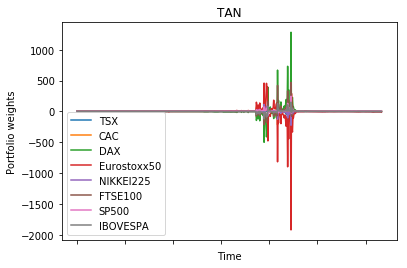

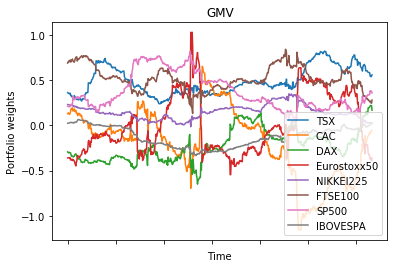

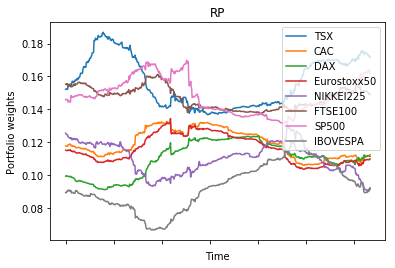

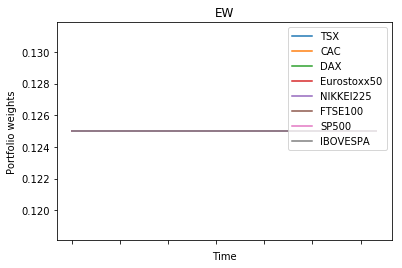

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [90]:
number_of_indexes = ret_weekly.shape[1]
ONES = np.ones(number_of_indexes)

dates = ret_weekly.iloc[(rolling_window_step-1):].index.get_level_values(0)
print(len(dates))
Rf_weekly.index = ret_weekly.index

w = np.zeros((len(dates), 4, number_of_indexes))
i = 0
for date in dates: 
    # esimation of parameters
    MU = roll_weekly_mean.loc[date].values
    STD = roll_weekly_std.loc[date].values
    SIGMA = roll_weekly_cov.loc[date].values
    INV_SIGMA = np.linalg.inv(SIGMA)
    #R0 = roll_Rf.loc[date]
    #i.e., estimation of risk premium (mu-R0)
    #An alternative is to esimate the expected return mu,
    #and to use the current risk-free rate to compute the weights.
    #In this second case, set: 
    R0 = Rf_weekly.loc[date]
    
    A = (ONES@INV_SIGMA)@ONES
    B = (ONES@INV_SIGMA)@MU
    C = (MU@INV_SIGMA)@MU
    DELTA = A*C-B**2
    
    # composition of portfolio
    w[i,0,:] = (INV_SIGMA@(MU-R0))/(B-A*R0) #TAN
    w[i,1,:] = (INV_SIGMA@ONES)/A # GMV
    tmp = 1/STD
    w[i,2,:] = tmp/tmp.sum() #RP
    w[i,3,:] = np.ones(number_of_indexes)/number_of_indexes #EW
    i+=1
    

#plotting portfolios
columns = ret_weekly.columns
asset_classes = columns
strategies = ['TAN','GMV','RP','EW']

print('\n (a) Time series of the portfolio weights:')
for i in range(len(strategies)): 
    df_w = pd.DataFrame(data=w[:,i,:],index=dates,columns=asset_classes)
    df_w.plot(title=strategies[i])
    plt.xlabel('Time')
    plt.ylabel('Portfolio weights')
    plt.legend(asset_classes, loc=0)
    plt.show()
print(sum(np.isnan(w)))

In [91]:
#computing portfolio returns
dates_perf = ret_weekly.iloc[rolling_window_step:].index.get_level_values(0)

p_perf = np.zeros((len(dates_perf), 4))
for j in range(len(strategies)): 
    tmp = np.multiply(w[:-1,j,:],ret_weekly.iloc[rolling_window_step:]) # :-1 means except the last
    p_perf[:,j] = tmp.sum(axis=1) # sum over each lines of the matrix and p_perf = returns on each portfolios [return port for each time, strategies]
    
df_p_perf = pd.DataFrame(data=p_perf,index=dates_perf,columns=strategies)

R0 = Rf_weekly.loc[dates_perf].mean()
M = df_p_perf.mean()
E = df_p_perf.mean()-R0
S = df_p_perf.std()
SR = E/S
index = ['Mean Return', 'Mean Excess Return', 'Std. Dev.', 'Sharpe Ratio']
pStats = pd.DataFrame({index[0] : M, 
                    index[1] : E,
                    index[2] : S, 
                    index[3] : SR
                      })
pStats = pStats.T
pStats = pStats.reindex(index)

index_a = [' (ann.)']*4
index_a = [x+y for x, y in zip(index, index_a)]
pStats_a = pd.DataFrame({index_a[0] : M*12, # change *12 cause were not anymore annual
                    index_a[1] : E*12,  # change *12 cause were not anymore annual
                    index_a[2] : S*np.sqrt(12),  # change *12 cause were not anymore annual
                    index_a[3] : SR*np.sqrt(12)  # change *12 cause were not anymore annual
                      })
pStats_a = pStats_a.T
pStats_a = pStats_a.reindex(index_a)

print('\n (b) Mean, standard deviation and Sharpe ratio of portfolio returns:')
print('\n The monthly return statistics of the strategies are:')
display(np.around(pStats,6))
print('\n The annualized return statistics of the strategies are:')
display(np.around(pStats_a,6))




 (b) Mean, standard deviation and Sharpe ratio of portfolio returns:

 The monthly return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return,0.014270,0.000288,0.001084,0.001182
Mean Excess Return,-0.011321,-0.025303,-0.024508,-0.024409
Std. Dev.,0.866962,0.020855,0.022988,0.023484
Sharpe Ratio,-0.013059,-1.213298,-1.066094,-1.039416



 The annualized return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return (ann.),0.171243,0.003457,0.013006,0.014185
Mean Excess Return (ann.),-0.135855,-0.303640,-0.294091,-0.292912
Std. Dev. (ann.),3.003243,0.072244,0.079634,0.081350
Sharpe Ratio (ann.),-0.045236,-4.202987,-3.693058,-3.600641



 (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:


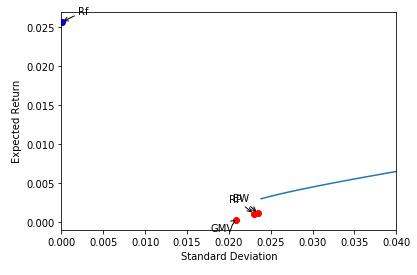

In [92]:
#MV frontiers
Mup = np.linspace(0.003,0.009,1000)
MU = ret_weekly.loc[dates_perf].mean().values
SIGMA = ret_weekly.loc[dates_perf].cov().values
INV_SIGMA = np.linalg.inv(SIGMA)


A = (ONES@INV_SIGMA)@ONES
B = (ONES@INV_SIGMA)@MU
C = (MU@INV_SIGMA)@MU
DELTA = A*C-B**2

Sigmap = np.sqrt((A*np.multiply(Mup,Mup)-2*B*Mup+C)/DELTA)

plt.plot(Sigmap,Mup)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.plot(S,M,'ro')
plt.plot(0.0001,R0,'bo')
plt.xlim(0, 0.04)


plt.annotate('TAN', xy=(S[0],M[0]), xytext=(S[0]-.003, M[0]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('GMV', xy=(S[1],M[1]), xytext=(S[1]-.003, M[1]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('RP', xy=(S[2],M[2]), xytext=(S[2]-.003, M[2]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('EW', xy=(S[3],M[3]), xytext=(S[3]-.003, M[3]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Rf', xy=(0, R0), xytext=(.001+.001, R0+.001),
            arrowprops=dict(arrowstyle="->")          
            )

print('\n (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:')
plt.show()





 (e) Cumulative performance of 1$ invested in December 1987:


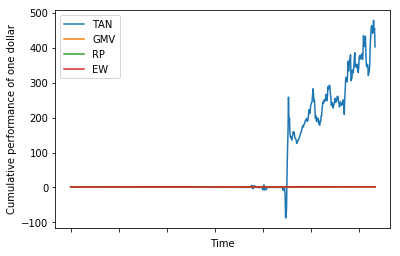

In [93]:
#total return index
dates_cumperf = ret_weekly.iloc[(rolling_window_step-1):].index.get_level_values(0)
ones = np.ones((1,4))

cumperf = np.cumprod(np.concatenate((ones,1 + p_perf),axis=0),axis=0) #cumprod because when we win money we reinvest it directly
df_cumperf = pd.DataFrame(data=cumperf,index=dates_cumperf,columns=strategies)

#df_cumperf.drop(columns=['TAN'],inplace=True)
df_cumperf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')
strategies = ['TAN','GMV','RP','EW']
#strategies = ['GMV','RP','EW']
plt.legend(strategies, loc=0)
#plt.ylim([-20,50])


print('\n (e) Cumulative performance of 1$ invested in December 1987:')
plt.show()


In [94]:
labels = np.zeros(len(p_perf))
for i in range(len(p_perf)): # the goal is to define the classification of the labels for the crossentropy loss
    opt = np.argmax(p_perf[i,:])
    labels[i] = opt
print(labels.shape)
print(labels)

labels_training = labels[:1012]
labels_test = labels[1012:]

print(labels_training.shape[0] + labels_test.shape[0])

(633,)
[3. 1. 3. 3. 3. 1. 1. 3. 3. 2. 3. 0. 2. 0. 0. 1. 3. 1. 1. 3. 3. 1. 0. 3.
 0. 0. 1. 3. 3. 3. 0. 3. 3. 3. 0. 1. 1. 3. 0. 1. 3. 3. 0. 2. 3. 1. 3. 0.
 0. 0. 3. 2. 1. 3. 3. 3. 2. 1. 0. 3. 2. 1. 1. 2. 3. 1. 1. 3. 3. 0. 0. 3.
 1. 2. 1. 3. 1. 3. 2. 2. 3. 3. 2. 1. 1. 3. 1. 3. 1. 3. 1. 3. 3. 1. 3. 3.
 1. 3. 3. 3. 3. 0. 0. 1. 2. 3. 1. 3. 3. 2. 3. 3. 1. 1. 1. 3. 1. 3. 1. 3.
 1. 2. 3. 1. 3. 0. 1. 3. 3. 3. 0. 0. 3. 0. 0. 3. 2. 3. 0. 1. 3. 3. 1. 3.
 0. 2. 3. 0. 3. 0. 3. 3. 1. 3. 0. 3. 2. 0. 1. 1. 3. 3. 0. 3. 0. 2. 3. 2.
 1. 3. 3. 2. 0. 3. 3. 3. 3. 3. 3. 0. 3. 1. 3. 3. 3. 3. 0. 3. 3. 3. 1. 1.
 0. 2. 0. 2. 0. 3. 3. 0. 3. 3. 3. 0. 1. 3. 3. 3. 2. 3. 0. 3. 3. 1. 1. 3.
 3. 0. 0. 3. 1. 3. 1. 3. 1. 0. 0. 1. 3. 1. 1. 3. 3. 2. 1. 3. 3. 0. 1. 1.
 0. 1. 2. 3. 0. 0. 0. 0. 3. 1. 2. 0. 1. 3. 3. 0. 3. 0. 1. 3. 3. 0. 0. 2.
 3. 1. 1. 1. 3. 0. 3. 3. 3. 1. 3. 0. 3. 1. 0. 0. 2. 3. 2. 1. 2. 0. 2. 3.
 3. 1. 0. 0. 1. 3. 2. 2. 3. 0. 0. 0. 0. 0. 0. 3. 0. 0. 3. 3. 3. 1. 0. 0.
 0. 3. 1. 3. 0. 0. 0. 3. 0. 0. 1. 3. 1. 3. 0

In [96]:
print(sum(labels_training == 0))
print(sum(labels_training == 1))
print(sum(labels_training == 2))
print(sum(labels_training == 3))

print(sum(labels_test == 0))
print(sum(labels_test == 1))
print(sum(labels_test == 2))
print(sum(labels_test == 3))

# starting date of labels : 11/14/2003 because we need five days of inputs in order to predict
# the best portfolio in 6 days
print(roll_weekly_mean.iloc[rolling_window_step])

#starting date of our inputs : 10/31/2003
print(roll_weekly_mean.iloc[rolling_window_step-2])

#last date of labels : 01/07/2016
print(ret_weekly.iloc[-1])

indexes = roll_weekly_mean.iloc[rolling_window_step-2:].index
index = indexes[0]
index

236
140
51
206
0
0
0
0
TSX           -0.000077
CAC           -0.001852
DAX           -0.002158
Eurostoxx50   -0.002206
NIKKEI225     -0.002566
FTSE100       -0.001632
SP500         -0.001195
IBOVESPA       0.001692
Name: 11/14/2003, dtype: float64
TSX           NaN
CAC           NaN
DAX           NaN
Eurostoxx50   NaN
NIKKEI225     NaN
FTSE100       NaN
SP500         NaN
IBOVESPA      NaN
Name: 10/31/2003, dtype: float64
TSX           -0.052813
CAC           -0.058489
DAX           -0.071038
Eurostoxx50   -0.061831
NIKKEI225     -0.066533
FTSE100       -0.050999
SP500         -0.058288
IBOVESPA      -0.061251
Name: 01/07/2016, dtype: float64


'10/31/2003'

In [97]:
def co_columns_name(columns, string):
    res =[]
    for c in columns:
        for c1 in columns:
            if c!=c1:
                res.append(string+c+"_"+c1)
    return res

def get_co_matrix(co_rolling, columns, co_columns, dates):  
    data = pd.DataFrame(columns = co_columns)
    count = 0
    for tick in columns:
        i = 0
        for tick2 in columns:
            if tick!=tick2:
                data[co_columns[count]] = co_rolling[tick][i::7].values
                count+=1
            i+=1
    return data.set_index(dates)
def include_co_in_input(inputs, co_data):
    for c in co_data.columns:
        inputs[c] = co_data[c]
    return inputs
corr_columns =co_columns_name(columns, "corr_")
print(corr_columns)
#print(corr_columns[5], corr_rolling["XOMA"][3::7])
cov_columns = co_columns_name(columns, "cov_")

['corr_TSX_CAC', 'corr_TSX_DAX', 'corr_TSX_Eurostoxx50', 'corr_TSX_NIKKEI225', 'corr_TSX_FTSE100', 'corr_TSX_SP500', 'corr_TSX_IBOVESPA', 'corr_CAC_TSX', 'corr_CAC_DAX', 'corr_CAC_Eurostoxx50', 'corr_CAC_NIKKEI225', 'corr_CAC_FTSE100', 'corr_CAC_SP500', 'corr_CAC_IBOVESPA', 'corr_DAX_TSX', 'corr_DAX_CAC', 'corr_DAX_Eurostoxx50', 'corr_DAX_NIKKEI225', 'corr_DAX_FTSE100', 'corr_DAX_SP500', 'corr_DAX_IBOVESPA', 'corr_Eurostoxx50_TSX', 'corr_Eurostoxx50_CAC', 'corr_Eurostoxx50_DAX', 'corr_Eurostoxx50_NIKKEI225', 'corr_Eurostoxx50_FTSE100', 'corr_Eurostoxx50_SP500', 'corr_Eurostoxx50_IBOVESPA', 'corr_NIKKEI225_TSX', 'corr_NIKKEI225_CAC', 'corr_NIKKEI225_DAX', 'corr_NIKKEI225_Eurostoxx50', 'corr_NIKKEI225_FTSE100', 'corr_NIKKEI225_SP500', 'corr_NIKKEI225_IBOVESPA', 'corr_FTSE100_TSX', 'corr_FTSE100_CAC', 'corr_FTSE100_DAX', 'corr_FTSE100_Eurostoxx50', 'corr_FTSE100_NIKKEI225', 'corr_FTSE100_SP500', 'corr_FTSE100_IBOVESPA', 'corr_SP500_TSX', 'corr_SP500_CAC', 'corr_SP500_DAX', 'corr_SP500_Eur

In [101]:
ret_daily_input = ret_daily.loc[index:]
ret_daily_input

len(corr_columns)

56

In [102]:
N_LABELS = number_of_indexes * 3 + 1 + len(corr_columns)
N_ASSETS = number_of_indexes
start_index= np.where(df_daily.index==index)[0]-rolling_window_step#596
start_index = start_index[0]
print(start_index)
rolling_window_step_daily = rolling_window_step 

ret_daily_rolling =  ret_daily.rolling(window=rolling_window_step_daily,min_periods=rolling_window_step_daily)

roll_daily_mean = ret_daily_rolling.mean()
roll_daily_std = ret_daily_rolling.std()
roll_Rf_daily_mean = Rf_fama.rolling(window=rolling_window_step_daily,min_periods=rolling_window_step_daily).mean()


def column_names(tickers,original =False, mean= False, std=False):
    res = []
    for t in tickers: 
        if original:
            res.append(t)
        if mean:
            res.append(t+"_mean")
        if std:
            res.append(t+"_std")
    return res

dates = ret_daily.loc[index:].index.get_level_values(0)
print(dates)
input_price = pd.DataFrame(ret_daily.loc[index:].values,columns=columns).set_index(dates)
input_mean = pd.DataFrame(roll_daily_mean.loc[index:].values,columns=column_names(columns, mean= True)).set_index(dates)
input_std = pd.DataFrame(roll_daily_std.loc[index:].values,columns=column_names(columns, std=True)).set_index(dates)

concat = pd.concat([input_price, input_mean, input_std], axis=1)
inputs = concat[column_names(columns, True, True, True)][:-number] #can not predict the last horizon
inputs['Rf'] = roll_Rf_daily_mean.loc[index:]
correlation_rolling = ret_daily_rolling.corr().dropna()[start_index*N_ASSETS:-number*N_ASSETS]
print(start_index)
#co[start_index*7:-number*7]
#correlation_data = get_co_matrix(correlation_rolling,columns, corr_columns,dates[:-number])
cov_rolling = ret_daily_rolling.cov().dropna()[start_index*N_ASSETS:-number*N_ASSETS]

cov_data = get_co_matrix(cov_rolling, columns, cov_columns,dates[:-number])
inputs = include_co_in_input(inputs, cov_data)
#inputs = include_co_in_input(inputs, correlation_data)
print(inputs)

def reshape_inputs(inputs, number):
    if inputs.shape[0] % number == 0:
        lstm_inputs = inputs.values.reshape((int(len(inputs)/number),number,N_LABELS))
        print("dataframe original shape", inputs.shape, "reshaped to ", lstm_inputs.shape)
    else:
        flo = np.floor(inputs.shape[0]/number)
        length = (flo + 1) * number
        length = length - inputs.shape[0]
        add = pd.DataFrame(0, index=np.arange(length), columns=inputs.columns)
        new_inputs = inputs.append(add)
        lstm_inputs = new_inputs.values.reshape((int(len(new_inputs)/number),number,N_LABELS))
        print(new_inputs)
        print("dataframe original shape", inputs.shape, "reshaped to ", lstm_inputs.shape)
    
    return lstm_inputs

lstm_inputs = reshape_inputs(inputs, number)


795
Index(['10/31/2003', '11/03/2003', '11/04/2003', '11/05/2003', '11/06/2003',
       '11/07/2003', '11/10/2003', '11/11/2003', '11/12/2003', '11/13/2003',
       ...
       '12/28/2015', '12/29/2015', '12/30/2015', '12/31/2015', '01/04/2016',
       '01/05/2016', '01/06/2016', '01/07/2016', '01/08/2016', '01/11/2016'],
      dtype='object', length=3173)
795


ValueError: Length of values does not match length of index

In [399]:
from sklearn.model_selection import train_test_split

#labels_training = labels[:1013]
#labels_test = labels[1013:]

X_train = lstm_inputs[:1012]
y_train = labels_training

X_test = lstm_inputs[1012:-1]
y_test = labels_test


#print(labels.shape,lstm_inputs.shape)
#X_train, X_test, y_train, y_test = train_test_split(lstm_inputs,labels, test_size=0.25)

print(X_train.shape, X_test.shape)
print(X_train.shape[0] + X_test.shape[0], labels.shape[0])

(1012, 5, 64) (175, 5, 64)
1187 1187


In [400]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_train = X_train.permute(1,0,2)

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
X_test = X_test.permute(1,0,2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([5, 1012, 64]) torch.Size([1012])
torch.Size([5, 175, 64]) torch.Size([175])


In [401]:
batch_dim = number #diviseur de valloader
traindataset = utils.TensorDataset(X_train.permute(1,0,2), y_train)
trainloader = utils.DataLoader(traindataset, batch_size=batch_dim, shuffle=True)

testdataset = utils.TensorDataset(X_test.permute(1,0,2), y_test)
testloader = utils.DataLoader(testdataset, batch_size=batch_dim, shuffle=True)

In [402]:
#let's define the lSTM network 

    
class LSTM(nn.Module):

    def __init__(self,input_size,output_size,batch_size,num_layers,hidden_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batch_size = batch_size

        # The LSTM takes features as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_size, hidden_size)

        # The linear layer that maps from hidden state space to output space
        self.hidden2output = nn.Linear(hidden_size, output_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_size))

    def forward(self, input_seq):
        
        output_seq, self.hidden = self.lstm(input_seq, self.hidden)#, None)
        last_output = output_seq[-1]
        output = self.hidden2output(last_output)
        
        return output
    
    def predict(self,x):
        out = self.forward(x)
        return out
        
    

In [409]:
from torch import optim

lr = 0.0000025

#weights = [1, 1, 3, 0.8]
#class_weights = torch.FloatTensor(weights)

print(X_train.shape[2])
lstm = LSTM(input_size = X_train.shape[2], output_size = 4, batch_size=batch_dim,num_layers=1,hidden_size = 250)
optimizer = optim.Adam(lstm.parameters(), lr=lr,weight_decay=1e-6)
criterion = nn.CrossEntropyLoss()#(weight=class_weights)

64


In [410]:
epochs = 50
steps = 0
print_every = 323
running_loss = 0

loss_train = []
loss_val = []
for e in range(epochs):
    start = time.time()
    
    total_train_loss=0
    steps_bis = 0
    if e % 40==0:
        lr /= 2
        optimizer = optim.Adam(lstm.parameters(), lr=lr,weight_decay=1e-6)

    for X_tr, y_tr in iter(trainloader):
        steps += 1
        steps_bis+=1
        
        # Clear stored gradient
        lstm.zero_grad()
        
        # Initialise hidden state
        # Don't do this if you want your LSTM to be stateful
        lstm.hidden = lstm.init_hidden()

        X_tr = X_tr.permute([1,0,2])
        #y_tr = y_tr.permute([1,0,2])
        
        if X_tr.shape[1] != batch_dim:
            continue

        in_train = Variable(X_tr)
        targets = Variable(y_tr).long()
        
        #optimizer.zero_grad()
        
        out = lstm.forward(in_train)
        
        loss = criterion(out, targets)
        
        loss.backward(retain_graph=True)
        optimizer.step()
        
        running_loss += loss.item()
    
        if steps % print_every == 0:
            stop = time.time()
            val_loss=0
            for ii, (X_validation, y_validation) in enumerate(testloader):
                    
                X_validation = X_validation.permute([1,0,2])
                #y_validation = y_validation.permute([1,0,2])
                    
                if X_validation.shape[1] != batch_dim:
                    continue
                    
                inputs = Variable(X_validation, volatile=True)
                predicted = lstm.predict(inputs)
                    
                val_loss+= (criterion(predicted,y_validation.long()).item())
                    
            print("Epoch: {}/{}..".format(e+1, epochs),
                "Validation loss: {:.4f}..".format(val_loss/ii),
                "Training loss: {:.4f}..".format(running_loss/print_every),
                "{:.4f} s/batch".format((stop - start)/print_every)
                )
                
            loss_val.append(val_loss/ii)
            loss_train.append(running_loss/print_every)
            running_loss = 0
            start = time.time()

/home/gregoire/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:59: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Epoch: 2/50.. Validation loss: 1.4266.. Training loss: 1.3805.. 0.0033 s/batch
Epoch: 4/50.. Validation loss: 1.4251.. Training loss: 1.3747.. 0.0010 s/batch
Epoch: 5/50.. Validation loss: 1.4235.. Training loss: 1.3767.. 0.0053 s/batch
Epoch: 7/50.. Validation loss: 1.4220.. Training loss: 1.3714.. 0.0028 s/batch
Epoch: 8/50.. Validation loss: 1.4204.. Training loss: 1.3730.. 0.0073 s/batch
Epoch: 10/50.. Validation loss: 1.4187.. Training loss: 1.3676.. 0.0030 s/batch
Epoch: 12/50.. Validation loss: 1.4172.. Training loss: 1.3661.. 0.0008 s/batch
Epoch: 13/50.. Validation loss: 1.4156.. Training loss: 1.3680.. 0.0044 s/batch
Epoch: 15/50.. Validation loss: 1.4139.. Training loss: 1.3625.. 0.0024 s/batch
Epoch: 16/50.. Validation loss: 1.4124.. Training loss: 1.3655.. 0.0054 s/batch
Epoch: 18/50.. Validation loss: 1.4106.. Training loss: 1.3584.. 0.0030 s/batch
Epoch: 20/50.. Validation loss: 1.4089.. Training loss: 1.3576.. 0.0008 s/batch
Epoch: 21/50.. Validation loss: 1.4072.. Trai

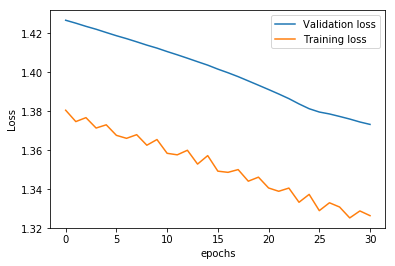

In [411]:
plt.plot(range(len(loss_val)),loss_val, label='Validation loss')
plt.plot(range(len(loss_train)),loss_train, label='Training loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()
loss_file="Loss_for_"
name_file= str(epochs)+" epochs_"+str(number)+"batch_"+str(rolling_window_step)+ "rollingwindow"
plt.savefig(loss_file+name_file)
plt.show()


In [412]:
y_pred = np.zeros((int(len(y_test)/batch_dim),batch_dim))
print(y_pred.shape)
for ii, (x_validation,y_validation) in enumerate(testloader):
    x_validation = x_validation.permute([1,0,2])           
    inputs = Variable(x_validation)
    if inputs.shape[1]!= batch_dim:
        print(ii*batch_dim-y_test.shape[0])
        break
    pred = lstm.predict(inputs).data.numpy()
    y_pred[ii,:] = np.argmax(pred, axis=1)
    print(pred)
y_pred.shape

(35, 5)
[[ 0.08880389 -0.09892089 -0.16615194  0.17403945]
 [ 0.10610809 -0.09667116 -0.17383441  0.18569721]
 [ 0.08900373 -0.0996333  -0.16595247  0.1746031 ]
 [ 0.10566586 -0.09726758 -0.17397857  0.185517  ]
 [ 0.10574602 -0.09615783 -0.17363295  0.18545705]]
[[ 0.11742803 -0.12010097 -0.23284212  0.24287778]
 [ 0.11898977 -0.11944515 -0.23414961  0.24403498]
 [ 0.1173769  -0.11907343 -0.23283654  0.24208122]
 [ 0.13620567 -0.11710598 -0.24272394  0.25614607]
 [ 0.13654655 -0.11720638 -0.24245501  0.2568619 ]]
[[ 0.1246486  -0.12539943 -0.25103247  0.26047093]
 [ 0.14268708 -0.12231369 -0.26007441  0.27295902]
 [ 0.12456231 -0.12527412 -0.25110024  0.2595157 ]
 [ 0.12655064 -0.12630382 -0.25354794  0.26310638]
 [ 0.14320239 -0.12437899 -0.26286688  0.27369109]]
[[ 0.12731981 -0.12670889 -0.25594971  0.26598683]
 [ 0.12815168 -0.12766862 -0.25788698  0.26757461]
 [ 0.14416742 -0.12404858 -0.264561    0.27742559]
 [ 0.12748103 -0.12680387 -0.25646591  0.26638708]
 [ 0.14617798 -0.125

(35, 5)

(176, 5)

 (e) Cumulative performance of 1$ invested in December 1987:


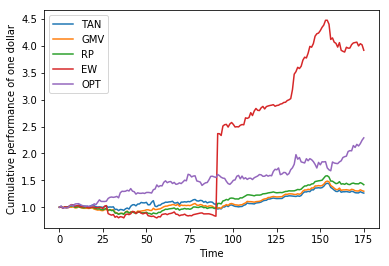

In [413]:
y_bar = np.reshape(y_pred,y_pred.shape[0]*y_pred.shape[1])

p_perf_test = p_perf[1012:]
dif = p_perf_test.shape[0] - y_bar.shape[0]

y_bar_approxi = np.append(y_bar,np.zeros(dif))

opt_portfolio = np.zeros(len(p_perf_test))
for i in range(len(p_perf_test)):
    opt_portfolio[i] = p_perf[i,int(y_bar_approxi[i])]

performance = np.c_[p_perf_test, opt_portfolio ]
strategies = ['TAN','GMV','RP','EW','OPT']

ones = np.ones((1,5))
cumperf = np.cumprod(np.concatenate((ones,1 + performance),axis=0),axis=0) #cumprod because when we win money we reinvest it directly
print(cumperf.shape)
df_cumperf = pd.DataFrame(data=cumperf,columns=strategies) #,index=dates_cumperf

df_cumperf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')
plt.legend(strategies, loc=0)
#plt.ylim([-20,50])


print('\n (e) Cumulative performance of 1$ invested in December 1987:')
plt.savefig("Cumulative_perf_of_1$"+name_file)
plt.show()